In [1]:
import os
import sys
import pandas as pd
import numpy as np
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datafolder = "D:\\neuroscienceresources\\datasets\\Dataset_2018a\\"
os.listdir(datafolder)

['coverFigure.png',
 'dataSharing.pdf',
 'dbori32.mat',
 'dbspont.mat',
 'dbstimspont.mat',
 'ori32_M160825_MP027_20161215.mat',
 'ori32_M161025_MP030_20170625.mat',
 'ori32_M170604_MP031_20170626.mat',
 'ori32_M170714_MP032_20170802.mat',
 'ori32_M170717_MP033_20170817.mat',
 'spont_M150824_MP019_20160405.mat',
 'spont_M160825_MP027_20161212.mat',
 'spont_M160907_MP028_20160926.mat',
 'spont_M161025_MP030_20161120.mat',
 'spont_M161025_MP030_20170616.mat',
 'spont_M161025_MP030_20170623.mat',
 'spont_M170714_MP032_20170804.mat',
 'spont_M170717_MP033_20170818.mat',
 'spont_M170717_MP034_20170825.mat',
 'stimspont_M150824_MP019_20160323.mat',
 'stimspont_M170604_MP031_20170627.mat',
 'stimspont_M170714_MP032_20170801.mat',
 'stimspont_M170717_MP033_20170825.mat']

# Understanding the content and structure of the "spont_*.mat"

In [3]:
mt = sio.loadmat(f'{datafolder}spont_M150824_MP019_20160405.mat')

In [4]:
type(mt)

dict

In [5]:
mt.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fsp', 'beh', 'db', 'med', 'stat'])

In [6]:
for key in '__header__', '__version__', '__globals__' :
    print(mt[key])

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 19 15:10:31 2018'
1.0
[]


### Fsp contains spike information for the neurons from what I understand. Looking at the array, it seems like average number of spikes at each time bin over multiple repeats, or something like that ? So, each row represents the PSTH of that neuron ?

In [7]:
spks = mt['Fsp']
spks.shape

(11983, 21055)

In [8]:
spks[0]

array([0.     , 8.94625, 0.     , ..., 0.     , 0.     , 0.     ],
      dtype=float32)

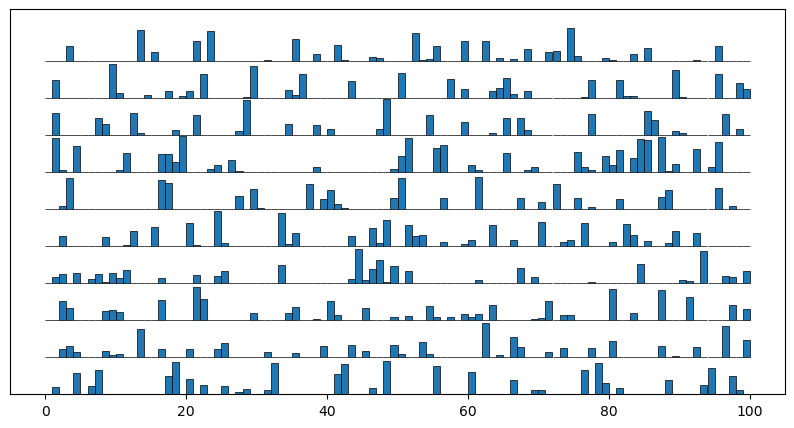

In [15]:
fig,ax = plt.subplots(figsize=(10, 5))

### plot subset of points
len_plot = 100

### plot subset of neurons
len_neurons = 10

for i in range(len_neurons):
    ax.bar(
        x=np.arange(len_plot), 
        height = spks[i][:len_plot]/(max(spks[i][:len_plot])+5), 
        y = i, 
        width=1,
        align="edge",
        color="tab:blue",
        ec="k",
        lw=0.5
    );
ax.set_yticks([]);
ax.set_yticks([], minor=True);

### med contains the x,y,z coordinates of the cell centers. Not sure what the scale is here, or if it matters at all - need to ask

In [17]:
med = mt["med"]
med

array([[174,   6,  70],
       [220,   4,  70],
       [ 18,  16,  70],
       ...,
       [806, 510, 350],
       [944, 638, 350],
       [938, 978, 350]], dtype=uint16)

### beh contains the behavioral variables face, whisker, eye, pupil, runSpeed, runAngle

In [70]:
beh = mt["beh"]
beh.dtype.names

('face', 'whisker', 'eye', 'pupil', 'runSpeed', 'runAngle')

In [58]:
beh[0]["runSpeed"][0].shape

(21055, 1)

In [56]:
beh[0]["pupil"][0]["area"][0][0].shape, beh[0]["pupil"][0]["com"][0][0].shape

((21055, 1), (21055, 2))

In [50]:
beh[0]["eye"][0]["motionSVD"][0][0].shape

(21055, 500)

In [49]:
beh[0]["whisker"][0]["motionSVD"][0][0].shape

(21055, 500)

In [48]:
beh[0]["whisker"][0]["motionMask"][0][0].shape

(216, 304, 500)

In [67]:
beh[0]["face"][0]["motionSVD"][0][0].shape, beh[0]["face"][0]["motionMask"][0][0].shape, beh[0]["face"][0]["avgframe"][0][0].shape

((21055, 1000), (240, 320, 1000), (240, 320))

### stat contains cell statistics. I don't think I understand all the names right away. Guessing -> npix is the number of neuropixels ? ipix is the index of those neuropixels ? xpix and ypix are their x,y coordinates ? No idea what lam and lambda are, but they seem to have the same values. med is probably median value of the xpix and ypix ? 

In [97]:
mt['stat'].dtype.names

('ipix',
 'ypix',
 'xpix',
 'lam',
 'lambda',
 'npix',
 'med',
 'neuropilCoefficient',
 'baseline',
 'footprint',
 'mrs',
 'mrs0',
 'cmpct',
 'aspect_ratio',
 'ellipse',
 'mimgProj',
 'mimgProjAbs',
 'isoverlap',
 'radius',
 'ipix_neuropil',
 'dFstat',
 'skew',
 'std',
 'maxMinusMed',
 'top5pcMinusMed',
 'blockstarts',
 'iplane',
 'iscell',
 'noiseLevel')

In [105]:
mt["stat"].shape

(11983, 1)

In [122]:
mt["stat"][0]["ipix"][0]

array([[  85],
       [  86],
       [  87],
       [  88],
       [  89],
       [ 590],
       [ 591],
       [ 592],
       [ 593],
       [ 594],
       [1095],
       [1096],
       [1097],
       [1098],
       [1099],
       [1600],
       [1601],
       [1602],
       [1603],
       [1604],
       [2107]], dtype=uint16)

In [125]:
mt["stat"][0]["xpix"][0], mt["stat"][0]["ypix"][0]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [2],
        [2],
        [2],
        [2],
        [2],
        [3],
        [3],
        [3],
        [3],
        [3],
        [4],
        [4],
        [4],
        [4],
        [4],
        [5]], dtype=uint8),
 array([[85],
        [86],
        [87],
        [88],
        [89],
        [85],
        [86],
        [87],
        [88],
        [89],
        [85],
        [86],
        [87],
        [88],
        [89],
        [85],
        [86],
        [87],
        [88],
        [89],
        [87]], dtype=uint8))

In [121]:
mt["stat"][0]["lam"][0]

array([[0.04830076],
       [0.03870747],
       [0.04248038],
       [0.03726253],
       [0.03969928],
       [0.03535555],
       [0.03185806],
       [0.08425262],
       [0.06053389],
       [0.04283789],
       [0.03332639],
       [0.02374066],
       [0.11862525],
       [0.11202304],
       [0.04071294],
       [0.02536506],
       [0.02788823],
       [0.06226631],
       [0.04234272],
       [0.0263302 ],
       [0.02609076]])

In [123]:
mt["stat"][0]["npix"]

array([array([[21]], dtype=uint8)], dtype=object)

In [124]:
mt["stat"][0]["med"]

array([array([[87,  3]], dtype=uint8)], dtype=object)

### db contains some metadata I believe - not super useful right now

In [95]:
for name in mt['db'].dtype.names:
    print(f"{name} - {mt['db'][name]}")

mouse_name - [[array(['M150824_MP019'], dtype='<U13')]]
mouse_type - [[array(['RASGRF_G6s'], dtype='<U10')]]
date - [[array(['2016-04-05'], dtype='<U10')]]
expts - [[array([[ 7,  8,  9, 11]], dtype=uint8)]]
nplanes - [[array([[10]], dtype=uint8)]]
zoom - [[array([[1]], dtype=uint8)]]
expt_name - [[array([[array(['spont_gray'], dtype='<U10'),
          array(['spont_gray'], dtype='<U10'),
          array(['spont_gray'], dtype='<U10'),
          array(['spont_gray'], dtype='<U10')]], dtype=object)]]
comments - [[array(['pupil and face processed'], dtype='<U24')]]
nchannels - [[array([], shape=(1, 0), dtype=float64)]]
expred - [[array([], shape=(1, 0), dtype=float64)]]
nchannels_red - [[array([], shape=(1, 0), dtype=float64)]]
badframes0 - [[array([], shape=(1, 0), dtype=float64)]]
Zexpt - [[array([], shape=(1, 0), dtype=float64)]]
Zplanes - [[array([], shape=(1, 0), dtype=float64)]]
Zchannels - [[array([], shape=(1, 0), dtype=float64)]]
Zzoom - [[array([], shape=(1, 0), dtype=float64)]]


# Understanding the content of dbspont.mat

### Seems to contain the metadata information; not useful. I am guessing it will be similar for dbori32 and dbspontsim as well so not loading them.

In [127]:
dbspontmt = sio.loadmat(f'{datafolder}dbspont.mat')
dbspontmt

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 16 12:10:06 2018',
 '__version__': '1.0',
 '__globals__': [],
 'db': array([[(array(['M150824_MP019'], dtype='<U13'), array(['RASGRF_G6s'], dtype='<U10'), array(['2016-04-05'], dtype='<U10'), array([[ 7,  8,  9, 11]], dtype=uint8), array([[10]], dtype=uint8), array([[1]], dtype=uint8), array([[array(['spont_gray'], dtype='<U10'),
                 array(['spont_gray'], dtype='<U10'),
                 array(['spont_gray'], dtype='<U10'),
                 array(['spont_gray'], dtype='<U10')]], dtype=object), array(['pupil and face processed'], dtype='<U24'), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64)),
         (array(['M160907_MP028'], dtype

# Understanding the structure and contents of stimspont_*.mat

In [129]:
stimspontmt = sio.loadmat(f'{datafolder}stimspont_M150824_MP019_20160323.mat')
stimspontmt.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fsp', 'beh', 'med', 'stat', 'stim', 'stimtpt'])

### Seems very similar to spont mat files except for the stim and stimtpt keys

In [134]:
stim = stimspontmt["stim"]
stim.dtype.names

('resp', 'istim', 'stimtimes')

In [176]:
stim[0]["resp"][0].shape

(3000, 11698)

In [178]:
stim[0]["istim"][0].shape

(3000, 1)

In [193]:
stim[0]["stimtimes"][0][0].shape, stim[0]["stimtimes"][0][0][5].shape, stim[0]["stimtimes"][0][0][5][19][0].shape

((10,), (26, 1), (1, 1000))

In [169]:
stimtpt = stimspontmt["stimtpt"]
stimtpt

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [174]:
np.unique(stimtpt.flatten()), stimtpt.shape

(array([0, 1], dtype=uint8), (23544, 1))